<center><img src="https://miro.medium.com/v2/resize:fit:1250/format:webp/1*QgI1t-7yJApi4vQigFgsLQ.jpeg" width=30% ></center>

# <center> Lab Project Part 1: Image Classification using Bag-of-Words </center>
<center> Computer Vision 1, University of Amsterdam </center>
<center> Due 23:59, October 21, 2023 (Amsterdam time) </center>

***

<center>
<b>TA's: Qi Bi, Avik Pal, Nimi Barazani</b>

Student1 ID: 12695106\
Student1 Name:
Richter van Emmerik

Student2 ID: 12481440\
Student2 Name:
Evelyn Pomasqui Penafiel

Student3 ID: \
Student3 Name:

( Student4 ID: \
Student4 Name: )
</center>

# **Instructions**

1. For both parts of the final project, students are expected to prepare a report. The report should include answers to all questions, written details on implementation approaches, the analysis of the results for different settings and visualizations to illustrate experiments with and performance of your implementation. Grading will primarily be based on the report (i.e. it should be self-contained as much as possible). If the report contains any faulty results or ambiguities, the TA's can take a look at your code to find out what happened.

2. Do not just provide numbers without explanation, remember to follow the general guidelines and discuss different settings to show you understand the material and the processes at work.

3. For qualitative evaluation, you are expected to visualize the top-5 and the bottom-5 ranked test images (based on the classifier confidence for the target class) per setup. That means you are supposed to provide a figure for each experimental setup, as discussed in Section 2.6.

**Hint:** Having visual elements such as charts, graphs and plots are always useful for everyone. Keep this in mind while writing your reports.


# **General Guidelines**
1. Aim:
    - Able to understand the basic Image Recognition/Classification pipeline using a traditional Bag of Words method.
    - Able to use to python packages for image classification: *matplotlib, cv2, sklearn etc.*
2. Prerequisite:
    - Familiarity with Python and relevant packages.
    - Know the basics of feature descriptors (SIFT, HoG) and machine learning tools (K-means, SVM and etc.).
3. Guidelines:
    Students should work on the assignments in their assignment group for **two** weeks.

    Any questions regarding the assignment content can be discussed on Piazza.
    
    Your source code and report must be handed in together in a zip file (**ID1_ID2_ID3_part1.zip**) before the deadline. Make sure your report follows these guidelines:
    - *The maximum number of pages for this part is 10 (single-column, including tables and figures). Please express your thoughts concisely.*
    - *Follow the given instructions and answer all given questions. Briefly describe what you implemented.*
    - *Show you understand the algorithms and implementations: explain why certain settings produce certain results. When constructing graphs, tables and other figures, make your figures as informative as possible (choose relevant sample sizes, axes, etc.), to illustrate your arguments*
    - *Tables and figures must be accompanied by a brief description. Do not forget to add a number, a title, and if applicable name and unit of variables in a table, name and unit of axes and legends in a figure.*

4. The report should be handed in in **PDF-format**. Your code should be handed in in **.ipynb format**. This does not mean you have to make your project in a notebook, it just means it **should be submitted as a notebook**. Be sure to test whether all your functionality works as expected when ran in a notebook. If you use a Conda environment, be sure to include it in your submission.

5. **Late submissions** are not allowed. Assignments that are submitted after the strict deadline will not be graded. In case of submission conflicts, TAs' system clock is taken as reference. We strongly recommend submitting well in advance, to avoid last minute system failure issues.
6. **Plagiarism note**:
Keep in mind that plagiarism (submitted materials which are not your work) is a serious crime and any misconduct shall be punished with the university regulations.
This includes the use of ChatGPT and other generative AI tools.

<!-- ### PyTorch versions
we assume that you are using latest PyTorch version(>=1.4)

### PyTorch Tutorial & Docs
This tutorial aims to make you familiar with the programming environment that will be used throughout the course. If you have experience with PyTorch or other frameworks (TensorFlow, MXNet *etc.*), you can skip the tutorial exercises; otherwise, we suggest that you complete them all, as they are helpful for getting hands-on experience.

**Anaconda Environment** We recommend installing \textit{anaconda} for configuring \textit{python} package dependencies, whereas it's also fine to use other environment managers as you like. The installation of anaconda can be found in [anaconda link](https://docs.anaconda.com/anaconda/install/).

**Installation** The installation of PyTorch is available at [install link](https://pytorch.org/get-started/locally/) depending on your device and system.

**Getting start** The 60-minute blitz can be found at [blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html), and and examples are at [examples](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html)

**Documents** There might be potential unknown functions or classes, you shall look through the official documents website ([Docs](https://pytorch.org/docs/stable/index.html)) and figure them out by yourself. (***Think***:} What's the difference between *torch.nn.Conv2d* and *torch.nn.functional.conv2d*?)
You can learn pytorch from the [tutorial link](https://pytorch.org/tutorials/). The Docs information can be searched at [Docs](https://pytorch.org/docs/stable/index.html). In this assignments, we wish you to form the basic capability of using one of the well-known   -->

# **1. Introduction**

The goal of the assignment is to implement a system for image classification. In other words, this system should tell if there is an object of given class in an image. You will perform 5-class ({1: *airplanes*, 2: *birds*, 3: *ships*, 4: *horses*, 5: *automobiles*}) image classification based on a bag-of-words approach ([reference](http://www.robots.ox.ac.uk/~az/icvss08_az_bow.pdf)) using SIFT features. [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) will be used for the task. For each class, the test sub-directories contain 1000 images, and the training sub-directories contain 5000 images. Images are represented as (RGB) 32x32 pixels.

Download the [dataset](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz). The archive contains the files *data_batch_1*, *data_batch_2*, ..., *data_batch_5*, as well as *test_batch*. Download the dataset and make yourself familiar with it by figuring out which images and labels you need for the aforementioned 5 classes.

**Note:** You may also opt to work with a subset of the training images if you choose, as long as this subset includes at least 500 images from each of the 5 classes. This option is to allow for a more manageable workload, especially if computational resources are limited. If applicable, consider the effects of using this smaller set of images on the quality of your implementation.

**Hint:**
In a real scenario, the public data you use often deviates from your task. You need to figure it out and re-arrange the labels as required using the *lab1_utils.py* file (provided in the zip) as a reference. You may (or may not) choose to use the following code to load the dataset:



In [ ]:
pip install torch

In [ ]:
pip install torchvision

In [26]:
from lab1_utils import CIFAR10
trainset = CIFAR10("./data", train=True, N=1000)
testset = CIFAR10("./data", train=False)

training_data = trainset.data
training_label = trainset.targets

Files already downloaded and verified
Files already downloaded and verified


## **1.1 Training Phase**

Training must be conducted over the training set.
Later on the training set will be divided into two subsets, one for building the visual vocabulary, and the other for training the classifier.
Keep in mind that using more samples in training will likely result in better performance. However, if your computational resources are limited and/or your system is slow, it's OK to use less training data to save time.

**Hint:** To debug your code, you can use a small amount of input images/descriptors. Once you are sure everything works properly, you can run your code for the experiment using all the data points.

**Hint:** You are not allowed to use the test images for training purpose.

## **1.2 Testing Phase**

You have to test your system using the specified subset of test images. All 1000 test images (per class) should be used at once for testing to observe the full performance. Again, exclude them from training for fair comparison.

# **2. Bag-of-Words based Image Classification**

Bag-of-Words based Image Classification system contains the following steps:
1. Feature extraction and description
2. Building a visual vocabulary (use the first subset from the training set)
3. Quantify features using visual dictionary (encoding)
4. Representing images by frequencies of visual words
5. Train the classifier (use the second subset from the training set)

We will consider each step in detail.


## **2.1 Feature Extraction and Description**

SIFT descriptors can be extracted from keypoints. You can use SIFT related functions in *OpenCV* for feature extraction.

####  **` Q2.1: Extract SIFT descriptors from training datasets based on keypoints. Show two images from each of the five classes (draw the circles with the size of keypoints). (10-pts).`**  

**Hint:**
Check out the Docs of SIFT and related functions for further information in the following [link1](https://docs.opencv.org/master/da/df5/tutorial_py_sift_intro.html) and [link2](https://docs.opencv.org/master/d7/d60/classcv_1_1SIFT.html).

In [2]:
#####################################################
# YOUR CODE HERE
######################################################
import cv2
import numpy as np
sift = cv2.xfeatures2d.SIFT_create()

class_count = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}

for i in range(len(training_data)):
    image = training_data[i]
    label = training_label[i]

    if class_count[label] >= 2:
        continue

    keypoints, descriptors = sift.detectAndCompute(image, None)

    image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    cv2.imshow(f"Class {label}", image_with_keypoints)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    class_count[label] += 1

    if all(count == 2 for count in class_count.values()):
        break    
        


## **2.2 Building Visual Vocabulary**

Here, we will obtain visual words by clustering feature descriptors, so each cluster center is a visual word. Take a subset of all training images (this subset should contain images from ALL categories), extract SIFT descriptors from all of these images, and run k-means clustering (you can use your favourite k-means implementation) on these SIFT descriptors to build your visual vocabulary. Then, take the rest of the training images to calculate a visual dictionary.

You can also use less images, say 100 from each class (exclusive from the previous subset) if your computational resources are limited (remember to analyze the effects). Pre-defined cluster numbers will be the size of your vocabulary. In this question, set its size to 1000.

####  **` Q2.2: Building Visual Vocabulary. (10-pts)`**
Create a visual vocabulary by using K-means clustering. Remember to display the results when the vocabulary subset is 30\%, 40\% and 50\% amount of the training images. The vocabulary size is fixed 1000 in this question.

**Hint 1:** Remember first to debug all the code with a small amount of input images and only when you are sure that code functions correctly run it for training over the larger dataset.

**Hint 2:** You can achieve K-means clustering using either *sklearn* package or *scipy* package.

**Hint 3:** Results of K-means clustering could be shown using a scatter plot. In this case, the high-dimensional SIFT descriptors need to be brought down to a lower (2D) dimension  (*PCA* from *sklearn.decomposition* is one method to do this). For easy visualization, plotting up to 10 clusters would suffice. Check out an example implementation [here](https://www.askpython.com/python/examples/plot-k-means-clusters-python). Note that you are free to follow this approach, or you can show the K-means results in any other appropriate method that drives home your point.

In [46]:
######################
# YOUR CODE HERE
######################
# this creates a subset of images for 100 of each class
def create_subset(training_data, subset_percentage):
    subset_images = []
    subset_labels = []
    class_count = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0}
    num_classes = len(class_count)
    num_images_per_class = int(len(training_data) * subset_percentage / num_classes)

    for i in range(len(training_data)):
        image = training_data[i]
        label = training_label[i]

        if class_count[label] >= num_images_per_class:
            continue

        subset_images.append(image)
        subset_labels.append(label)
        class_count[label] += 1

        if all(count == num_images_per_class for count in class_count.values()):
            break

    return np.array(subset_images)

subset_images = create_subset(training_data, subset_percentage=0.3)


In [48]:
# this extracts the descriptors and runs the k-means algorithm 
from sklearn.cluster import KMeans
vocab_size = 128
def exctract_descriptors(subset_images):
    sift = cv2.xfeatures2d.SIFT_create()
    descriptors = []

    for image in subset_images:
        keypoints, descriptor = sift.detectAndCompute(image, None)
        if descriptor is not None:
            descriptors.append(descriptor)

    descriptors = np.concatenate(descriptors, axis=0)
    return descriptors

def kmeanss(descriptors, vocab_size):
    kmeans = KMeans(n_clusters=vocab_size)
    kmeans.fit(descriptors)
    return kmeans

# descriptors = exctract_descriptors(subset_images) 
# kmeans = kmeanss(descriptors, vocab_size)   

In [49]:
# takes the remaining images
def take_remaining_images(subset_images, training_data):
    subset_images_array = np.array(subset_images)
    remaining_images = []

    for i in range(len(training_data)):
        if not any(np.array_equal(training_data[i], img) for img in subset_images_array): 
            remaining_images.append(training_data[i])

    remaining_images = np.array(remaining_images)
    return remaining_images
#remaining_images = take_remaining_images(subset_images, training_data)    

In [50]:
# makes the visual dictionary
def visual_dictionary(remaining_images, kmeans):
    visual_dictionaries = []
    for image in remaining_images:
        keypoints, descriptor = sift.detectAndCompute(image, None)
        if descriptor is not None:
            labels = kmeans.predict(descriptor)
            histogram, _ = np.histogram(labels, bins=range(kmeans.n_clusters+1))
            visual_dictionaries.append(histogram)
    visual_dictionaries = np.array(visual_dictionaries)
    return visual_dictionaries
#visual_dictionaries = visual_dictionary(remaining_images, kmeans)    

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
visual_dictionary_2d = pca.fit_transform(visual_dictionaries)

plt.scatter(visual_dictionary_2d[:, 0], visual_dictionary_2d[:, 1])
plt.show()

## **2.3 Encoding Features Using Visual Vocabulary**

Once we have a visual vocabulary, we can represent each image as a collection of visual words. For this purpose, we need to extract feature descriptors (with SIFT) and then assign each descriptor to the closest visual word from the vocabulary.

In [56]:
######################
# YOUR CODE HERE
######################
from sklearn.neighbors import NearestNeighbors
def assign_to_visual_word(visual_dictionary, descriptors):

    nn = NearestNeighbors(n_neighbors=1)
    nn.fit(visual_dictionary)
    distances, indices = nn.kneighbors(descriptors)
    return indices
#indices_of_nearest_visual_word = assign_to_visual_word(visual_dictionaries, descriptors)    

In [57]:
# represent 1 image as visual of words histogram
def represent_image(image, visual_dictionaries):
    sift = cv2.xfeatures2d.SIFT_create()
    descriptors = sift.detectAndCompute(image, None)[1]
    k=128

    if descriptors is not None:
        indices = assign_to_visual_word(visual_dictionaries, descriptors)
        visual_word_histogram, _ = np.histogram(indices, bins=range(k + 1))
    else:
        visual_word_histogram = np.zeros(k)

    return visual_word_histogram

## **2.4 Representing images by frequencies of visual words**

The next step is the quantization. The idea is to represent each image by a histogram of its visual words. Check out matplotlib's [hist()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function. Since different images can have different numbers of features, histograms should be normalized.

####  **` Q2.4: Representing images by frequencies of visual words. (5-pts)`**

Pick a subset ratio from the above settings (30%, 40% and 50%). For each class, calculate the frequency of visual words. Visualize the visual words' frequency by histogram. The X-axis is supposed to be the visual word number (e.g.,from 0 to 1000), and the Y-axis is supposed to be the frequency. Describe the similarities and differences.

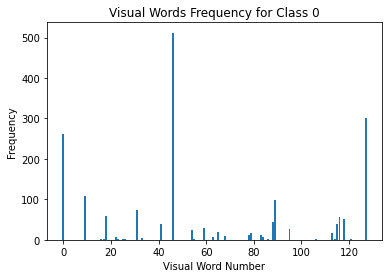

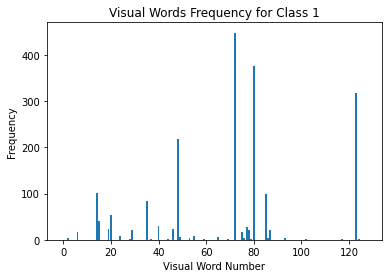

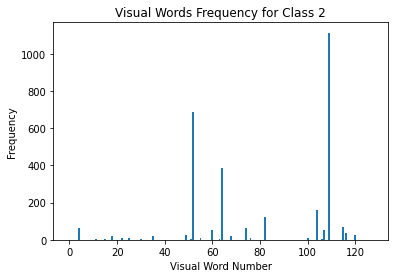

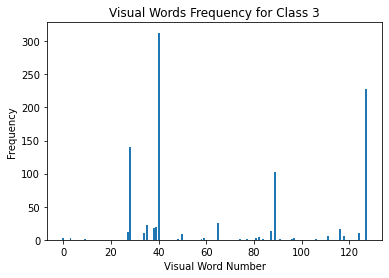

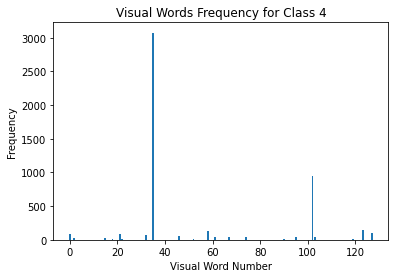

In [64]:
################################
# YOUR CODE HERE
################################
num_visual_words = 128

class_frequencies = []
for class_label in np.unique(training_label):
    class_indices = np.where(training_label == class_label)[0]
    class_images = training_data[class_indices]
    subset_class_images = create_subset(class_images, subset_percentage=0.3)
    class_descriptors = exctract_descriptors(subset_class_images)  

    kmeans = kmeanss(class_descriptors, num_visual_words)
    remaining_images = take_remaining_images(subset_class_images, class_images) 

    visual_dictionaries = visual_dictionary(remaining_images, kmeans)
    visual_word_indices = assign_to_visual_word(visual_dictionaries, descriptors)

    class_histogram, _ = np.histogram(visual_word_indices, bins=range(num_visual_words+1))
    class_frequencies.append(class_histogram)
    
class_frequencies = np.array(class_frequencies)

for i, class_frequency in enumerate(class_frequencies):
    plt.figure()
    plt.bar(range(num_visual_words), class_frequency)
    plt.xlabel('Visual Word Number')
    plt.ylabel('Frequency')
    plt.title(f'Visual Words Frequency for Class {i}')
    plt.show()    

## **2.5 Classification**

We will train a classifier per each object class. Now, we take the Support Vector Machine (SVM) as an example. As a result, we will have 5 *binary* classifiers.

Take images from the training set of the related class (should be the ones which you did not use for dictionary calculation). Represent them with histograms of visual words as discussed in the previous section. Use at least 50 training images per class or more, but remember to debug your code first! If you use the default setting, you should have 50 histograms of size 1000. These will be your positive examples.

Then, you will obtain histograms of visual words for images from other classes, again about 50 images per class, as negative examples. Therefore, you will have 200 negative examples.

Now, you are ready to train a classifier. You should repeat it for each class. To classify a new image, you should calculate its visual words histogram as described in Section 2.4 and use the trained SVM classifier to assign it to the most probable object class. (Note that for proper SVM scores you need to use cross-validation to get a proper estimate of the SVM parameters. In this assignment, you do not have to experiment with this cross-validation step).

####  **` Q2.5: Classification (5-pts)`**

Utilize SVM and finish classification training.

**Hint:**
You can use *scikit-learn* software to conduct SVM classification. The relevant documents can be found at this [link](https://scikit-learn.org/stable/modules/svm.html).

In [12]:
################################
# YOUR CODE HERE
################################
def prepare_data(training_data, training_label, class_label):
    num_positive_examples = 50
    num_negative_examples = 200
    positive_data = []
    negative_data = []

    # take positive 50 images for the class 
    class_indices = np.where(training_label == class_label)[0]
    positive_indices = class_indices[:num_positive_examples]
    positive_data.extend(training_data[positive_indices])

    # take negative 200 images 
    class_indices = np.where(training_label != class_label)[0]
    negative_indices = class_indices[:num_negative_examples]
    negative_data.extend(training_data[negative_indices])

    # test images
    remaining_indices = np.setdiff1d(np.arange(len(training_data)), np.concatenate([positive_indices, negative_indices]))
    test_data = training_data[remaining_indices]

    return np.array(positive_data), np.array(negative_data), test_data

positive_data_class0, negative_data_class0, test_data0 = prepare_data(training_data, training_label, class_label=0)        

In [13]:
def histogram_of_words(data, subset_percentage):
    num_visual_words = 128
    visual_word_histograms = []
    subset_images = create_subset(data, subset_percentage)
    descriptors = exctract_descriptors(subset_images)  

    kmeans = kmeanss(descriptors, k)
    remaining_images = take_remaining_images(subset_images, data) 

    visual_dictionaries = visual_dictionary(remaining_images, kmeans)
    visual_word_indices = assign_to_visual_word(visual_dictionaries, descriptors)

    histogram, _ = np.histogram(visual_word_indices, bins=range(num_visual_words+1))
    visual_word_histograms.append(histogram)
    return np.array(visual_word_histograms)

#visual_word_histograms = histogram_of_words(training_data)    

In [14]:
def the_visual_dict(data, subset_percentage):
    num_visual_words = 128
    visual_word_histograms = []
    subset_images = create_subset(data, subset_percentage)
    descriptors = exctract_descriptors(subset_images)  

    kmeans = kmeanss(descriptors, num_visual_words)
    remaining_images = take_remaining_images(subset_images, data) 

    visual_dictionaries = visual_dictionary(remaining_images, kmeans)

    return visual_dictionaries

In [58]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
def classifier_svm(training_data, training_label, class_label, subset_percentage):
    svm_classifier = make_pipeline(StandardScaler(), SVC(gamma='auto'))
    positive_data_class, negative_data_class, test_data = prepare_data(training_data, training_label, class_label=class_label)

    train_data = np.concatenate((positive_data_class, negative_data_class))
    
    visual_dict = the_visual_dict(train_data, subset_percentage)
    visual_words_histo = np.array([represent_image(image, visual_dict) for img in train_data])


    positive_labels = np.ones(positive_data_class.shape[0])
    negative_labels = np.zeros(negative_data_class.shape[0])

    train_labels = np.concatenate((positive_labels, negative_labels))
    svm_classifier.fit(visual_words_histo, train_labels)
    return svm_classifier, visual_dict, test_data

#classifier_class0 = classifier_svm(training_data, training_label, class_label=0)    


In [59]:
def classify_images(image, visual_dictionary, svm_classifier):
    visual_words_histo = represent_image(image, visual_dictionary)
    predicted_label = svm_classifier.predict(visual_words_histo.reshape(1, -1))
    
    return predicted_label
#classify_images(training_data, visual_dictionaries, classifier_class0)    

## **2.6 Evaluation**

To evaluate your system, you should take all the test images from all classes and rank them based on each binary classifier. In other words, you should classify each test image with each classifier and then sort them based on the classification score. As a result, you will have five lists of test images. Ideally, you would have images with airplanes on the top of your list which is created based on your airplane classifier, and images with cars on the top of your list which is created based on your car classifier, and so on.

In addition to the qualitative analysis, you should measure the performance of the system quantitatively with the Mean Average Precision (mAP) over all classes. The mAP for a single class c is defined as
\begin{equation}
\frac{1}{m_c} \sum_{i=1}^{n} \frac{f_c(x_i)}{i}\mbox{ ,}
\end{equation}
where $n$ is the number of images ($n=50\times 5=250$), $m$ is the number of images of class $c$  ($m_c=50$), $x_i$ is the $i^{th}$ image in the ranked list $X = \left \{ x_1, x_2, \dots, x_n  \right \}$, and finally, $f_c$ is a function which returns the number of images of class $c$ in the first $i$ images if $x_i$ is of class $c$, and 0 otherwise. To illustrate, if we want to retrieve $R$ and we get the following sequence: $[R, R, T, R, T, T, R, T]$, then $n = 8$, $m = 4$, and $AP(R, R, T, R, T, T, R) = \frac{1}{4} \left (  \frac{1}{1} + \frac{2}{2} + \frac{0}{3} + \frac{3}{4} + \frac{0}{5} + \frac{0}{6} + \frac{4}{7} + \frac{0}{8} \right )$.

####  **` Q2.6: Evaluation and Discussion (30-pts)`**

Show the evaluation results and describe. The report should include the analysis of the results for different settings such as:
- mAP based on different subset ratios to create the vocabulary list (30%, 40% and 50%) under the fixed vocabulary size 1000.
- Based on the ratio among the above four settings that lead to the best performance, change the vocabulary sizes to different sizes (500, 1000 and 1500). Report and discuss the mAP.
- Based on the above experiments, find the best setting. Report the mAP based on SIFT descriptor and HoG descriptor.
- Visualize the top-5 and the bottom-5 ranked test images (based on the classifier confidence for the target class) under the best setting.
- The impact of the hyper-parameters of SVM.  

**Hint 1:**
To alleviate the working load, the discussion on the impact of SVM’s hyper-parameter settings only need to based on the optimal settings from the first three questions.

**Hint 2:**
Be sure to discuss the differences between different settings such as vocabulary sizes in your report.

**Hint 3:**
You can use *skimage.feature.hog* to extract HoG descriptor. The relevant documents can be found at [link](https://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=hog#skimage.feature.hog).

In [116]:
training_data = trainset.data
training_label = trainset.targets

## mAP based on different subset ratios

In [19]:
##Map
def average_precision(rank_list, ground_truth):
    relevant_items = 0
    total_items = 0
    sum_precision = 0.0

    for i, pred in enumerate(rank_list):
        total_items += 1
        if pred[0] == ground_truth:
            relevant_items += 1
            sum_precision += relevant_items / total_items

    return sum_precision / relevant_items if relevant_items > 0 else 0

def mean_average_precision(rank_lists, ground_truths):
    sum_ap = 0.0

    for ground_truth, rank_list in zip(ground_truths, rank_lists):
        ap = average_precision(rank_list, ground_truth)
        sum_ap += ap

    return sum_ap / len(ground_truths)

### vocabulary list of 30%

In [ ]:
### initiate the classifier
classifier_class0, visual_dict = classifier_svm(training_data, training_label, class_label=0, subset_percentage=0.3)

In [62]:
def model(training_data, training_label, subset_percentage):
    rank_lists = []
    class_labels = np.unique(training_label)
    for class_label in class_labels:
        classifier_class, visual_dict, test_data = classifier_svm(training_data, training_label, class_label=class_label, subset_percentage=subset_percentage)
        
        rank_list = []
        for image in test_data:
            ranking = classify_images(image, visual_dict, classifier_class)
            rank_list.append(ranking)
        rank_lists.append(rank_list)
    return rank_lists    

rank_lists = model(training_data, training_label, subset_percentage=0.3)        


In [63]:
ground_truths = np.ones(5)
class_labels = np.unique(training_label)
for class_i in class_labels:
    ap = average_precision(rank_lists[class_i], ground_truths[class_i])
    print(f"The average precision for class {class_i} is: {ap}")

The average precision for class 0 is: 0
The average precision for class 1 is: 0
The average precision for class 2 is: 0
The average precision for class 3 is: 0
The average precision for class 4 is: 0


In [21]:
map = mean_average_precision(rank_lists, ground_truths)
print(f"The mean average precision(mAP) is: {map}")

The mean average precision(mAP) is: 0.0


### Vocabulary list of 40%

In [146]:
rank_lists = model(training_data, training_label, subset_percentage=0.4)

In [147]:
ground_truths = np.ones(5)
class_labels = np.unique(training_label)
for class_i in class_labels:
    ap = average_precision(rank_lists40[class_i], ground_truths[class_i])
    print(f"The average precision for class {class_i} is: {ap}")

The average precision for class 0 is: 0
The average precision for class 1 is: 0
The average precision for class 2 is: 0
The average precision for class 3 is: 0
The average precision for class 4 is: 0


In [148]:
ground_truths = np.ones(5)
mean_average_precision(rank_lists, ground_truths)

0.0

### Vocabulary list of 50%

In [149]:
rank_lists = model(training_data, training_label, subset_percentage=0.5)

In [150]:
ground_truths = np.ones(5)
class_labels = np.unique(training_label)
for class_i in class_labels:
    ap = average_precision(rank_lists50[class_i], ground_truths[class_i])
    print(f"The average precision for class {class_i} is: {ap}")

The average precision for class 0 is: 0
The average precision for class 1 is: 0
The average precision for class 2 is: 0
The average precision for class 3 is: 0
The average precision for class 4 is: 0


In [151]:
mean_average_precision(rank_lists, ground_truths)

0.0

## mAP hog descriptor

In [ ]:
pip install scikit-image

In [211]:
from skimage.feature import hog
from skimage.util import view_as_windows

def compute_local_hog_features(image, patch_size=(32, 32), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2)):
    patches = view_as_windows(image, patch_size)
    patches = patches.reshape(-1, patch_size[0], patch_size[1])
    hog_features = [hog(patch, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block) for patch in patches]
    return np.array(hog_features)

def represent_image_hog(image, visual_dictionaries):
    hog_features = compute_local_hog_features(image)
    visual_word_histograms = []
    for features in hog_features:
        indices = assign_to_visual_word(visual_dictionaries, features.reshape(1, -1))
        histogram, _ = np.histogram(indices, bins=range(visual_dictionaries.shape[0] + 1))
        visual_word_histograms.append(histogram)
    return np.array(visual_word_histograms)

def exctract_descriptors_hog(subset_images):
    descriptors = []
    for image in subset_images:
        hog_features = compute_local_hog_features(image)
        descriptors.extend(hog_features)
    return np.array(descriptors)

def visual_dictionary_hog(remaining_images, kmeans):
    visual_dictionaries = []
    for image in remaining_images:
        hog_features = compute_local_hog_features(image)
        for features in hog_features:
            labels = kmeans.predict(features.reshape(1, -1))
            histogram, _ = np.histogram(labels, bins=range(kmeans.n_clusters + 1))
            visual_dictionaries.append(histogram)
    return np.array(visual_dictionaries)

def the_visual_dict_hog(data, subset_percentage):
    num_visual_words = 324
    visual_word_histograms = []
    subset_images = create_subset(data, subset_percentage)
    descriptors = exctract_descriptors_hog(subset_images)  

    descriptors = descriptors.reshape(-1, 1)

    kmeans = kmeanss(descriptors, k=num_visual_words)
    remaining_images = take_remaining_images(subset_images, data) 

    visual_dictionaries = visual_dictionary_hog(remaining_images, kmeans)

    return visual_dictionaries  

def classifier_svm_hog(training_data, training_label, class_label, subset_percentage):
    svm_classifier = SVC(kernel='linear')
    positive_data_class, negative_data_class, test_data = prepare_data(training_data, training_label, class_label=class_label)

    train_data = np.concatenate((positive_data_class, negative_data_class))
    
    visual_dict = the_visual_dict_hog(train_data, subset_percentage)
    visual_words_histo = np.array([represent_image_hog(image, visual_dict) for img in train_data])


    positive_labels = np.ones(positive_data_class.shape[0])
    negative_labels = np.zeros(negative_data_class.shape[0])

    train_labels = np.concatenate((positive_labels, negative_labels))
    svm_classifier.fit(visual_words_histo, train_labels)
    return svm_classifier, visual_dict, test_data  

def classify_images_hog(image, visual_dictionary, svm_classifier):
    visual_words_histo = represent_image_hog(image, visual_dictionary)
    predicted_label = svm_classifier.predict(visual_words_histo.reshape(1, -1))
    
    return predicted_label       
     
def model_hog(training_data, training_label, subset_percentage):
    rank_lists = []
    class_labels = np.unique(training_label)
    for class_label in class_labels:
        classifier_class, visual_dict, test_data = classifier_svm_hog(training_data, training_label, class_label=class_label, subset_percentage=subset_percentage)
        
        rank_list = []
        for image in test_data:
            ranking = classify_images_hog(image, visual_dict, classifier_class)
            rank_list.append(ranking)
        rank_lists.append(rank_list)
    return rank_lists 

In [ ]:
rank_lists = model_hog(training_data, training_label, subset_percentage=0.3)

 # Individual Contribution Report *(Mandatory)*

Because we want each student to contribute fairly to the submitted work, we ask you to fill out the textcells below. Write down your contribution to each of the assignment components in percentages. Naturally, percentages for one particular component should add up to 100% (e.g. 30% - 30% - 40%). No further explanation has to be given.

Name: Richter van Emmerik

Contribution on research: 33%\
Contribution on programming: 33%\
Contribution on writing: 33%

Name: Evelyn Pomasqui Penafiel

Contribution on research: 33% \
Contribution on programming: 33% \
Contribution on writing: 33%

Name:

Contribution on research: \
Contribution on programming: \
Contribution on writing:

Name:

Contribution on research: \
Contribution on programming: \
Contribution on writing:

 # -End of Notebook-